In [0]:
!pip install factor_analyzer==0.2.3

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# 1. Load Dataset

In [0]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 2. Scikit-learn Version

In [0]:
x = tips[['total_bill', 'tip', 'size']].values
df = tips[['total_bill', 'tip', 'size']]
df.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [0]:
# FactorAnalysis performs a maximum likelihood estimate of the so-called 
# loading matrix, the transformation of the latent variables to the 
# observed ones, using expectation-maximization (EM).

from sklearn.decomposition import FactorAnalysis

factor = FactorAnalysis(n_components=3, random_state=42).fit(x)
print(pd.DataFrame(factor.components_, columns=['total_bill', 'tip', 'size']))

   total_bill       tip      size
0    8.827560  0.940874  0.572776
1   -0.054868  0.301503  0.195224
2   -0.000000  0.000000 -0.000000


# 3. Factor Analyzer Version

## 3.1. Bartlett's and Kaiser-Meyer-Olkin Tests

In [0]:
# Bartlett’s test of sphericity checks whether or not the observed variables 
# intercorrelate at all using the observed correlation matrix against the 
# identity matrix. If the test found statistically insignificant, you should 
# not employ a factor analysis.
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(259.0138522669992, 3.659554112936123e-56)

In [0]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor 
# analysis. It determines the adequacy for each observed variable and for the 
# complete model. KMO estimates the proportion of variance among all the 
# observed variable. Lower proportion id more suitable for factor analysis. 
# values range between 0 and 1. Value of KMO less than 0.6 is considered 
# inadequate.
kmo_all, kmo_model = calculate_kmo(df)
kmo_model

0.6806842770940551

## 3.2. Choosing the Number of Factors

In [0]:
fa = FactorAnalyzer()
fa.analyze(df, 2, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,2.178830
1,0.519127
2,0.302043


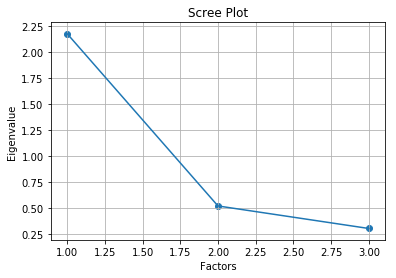

In [0]:
fig = plt.figure(figsize=(10, 7.5))
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [0]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 3, rotation="varimax")

fa.loadings

,Factor1,Factor2,Factor3
total_bill,0.640192,0.597084,0.104196
tip,0.684332,0.397291,0.003969
size,0.355807,0.618600,0.011273


# 3.3. Variance of Each Factor

In [0]:
# Get variance of each factors
# Total xx% cumulative Variance explained by the 5 factors.
fa.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,1.004755,0.897015,0.011000
Proportion Var,0.334918,0.299005,0.003667
Cumulative Var,0.334918,0.633923,0.637590
